# Samanyastra - FutureForge - June - 2025
---

Desclaimer: \
This notebook is a copyrighted property of samanyastra Education Pvt Ltd. Redistribution and selling of this property is a violation of conduct and leads to leagal action

---

Dear candidate, \
As a part of learning journey you will receive these notebooks across your 2 months of program which are supposed to be compleetd before 24 hours / mentioned number of hours in session. 

---

**How to use this notebook**

- just download your notebook and move to the folder where you want to work.
- `pip install notebook` run this command in your terminal if you do not have notebook module installed
- `cd path\to\your\file.ipynb` and `python -m notebook` run these two commands to open notebook in your desired folder. Please note to replace `path\to\your\file.ipynb` with your own path to this notebook
- write the necessary codes and hit ctrl+s or command+S to save it.
- once completed, upload the same notebook in the given submission link.

---

<div style="text-align:right">All the best, <br/> Team Samanyastra </div>

# Customer Segmentation (Clustering)

**Dataset:** Age, Gender, Customer ID, Annual Income, Spending Score

### Problem Statement

A shopping mall wants to **understand its customers** better. Based on their age, gender, annual income, and spending score, group customers into **meaningful segments**.

### Tasks

1. Perform **EDA** – visualize customers by income & spending score.
2. Apply **MinMaxScaler** to selected features.
3. Apply **K-Means clustering**.
4. Use **Elbow Method** to find optimal clusters.
5. Visualize clusters in 2D (Income vs Spending Score).
6. Interpret each cluster → (e.g., high income–low spending = potential customers).

### Hints

* Scaling avoids one feature dominating (e.g., income in thousands vs score in 0–100).
* Compare cluster results with/without gender.
* No confusion matrix here (unsupervised).

### Think

* Why might customers with **similar income** behave differently in spending?
* Does **gender** significantly impact clusters, or is income more dominant?
* What if you force more clusters (say k=7) – does it still make sense?
* How would segmentation help in **targeted marketing campaigns**?

### EDA Steps

1. **Data Inspection** → nulls, duplicates, data types

2. **Summary Stats** → mean income, mean spending score, age distribution

3. **Visualization**

   * Histograms for Age, Income, Spending Score
   * Scatter plots: Income vs Spending Score (color by Gender)
   * Countplots: Spending Score vs Gender

4. **Questions to Ask**

   * Do high-income customers always have high spending scores?
   * Is gender affecting income/spending patterns?
   * Which feature pairs seem to form natural groups?

---

### Data Preprocessing

* **Handle Missing Values** (fill or drop)
* **Remove CustomerID** (irrelevant for clustering)
* **Convert Gender to numeric** (if used)
* **Scaling with MinMaxScaler** (required for KMeans)

In [1]:

!pip install pandas openpyxl seaborn matplotlib

!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [5]:
df = pd.read_csv('Desktop/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


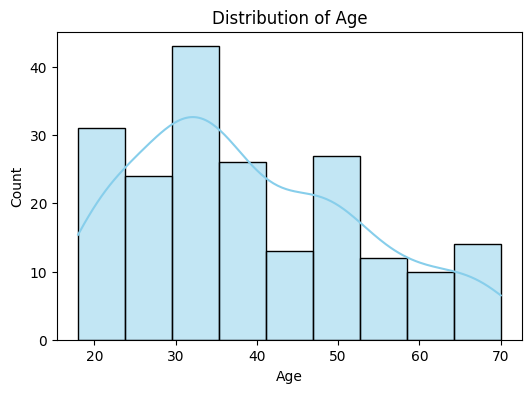

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

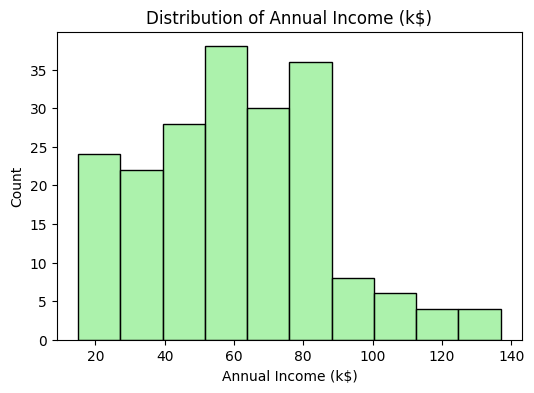

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], color='lightgreen')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

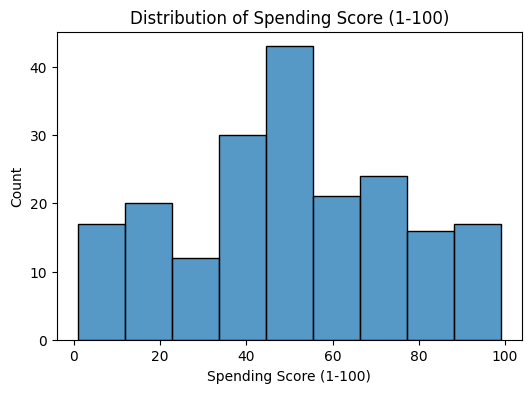

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

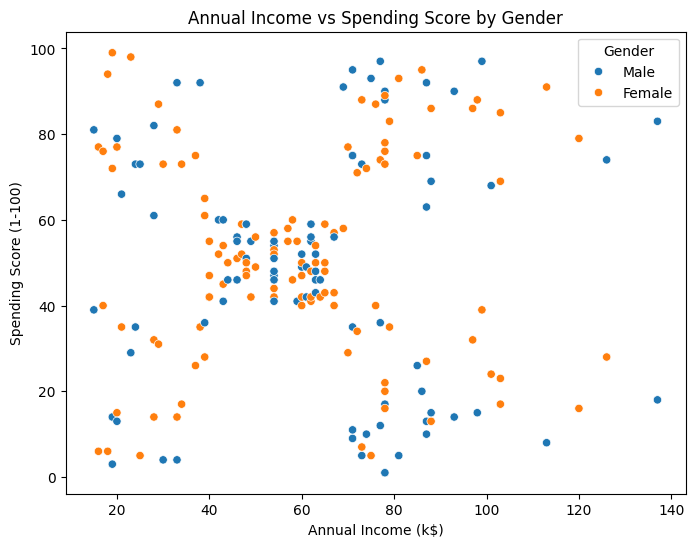

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

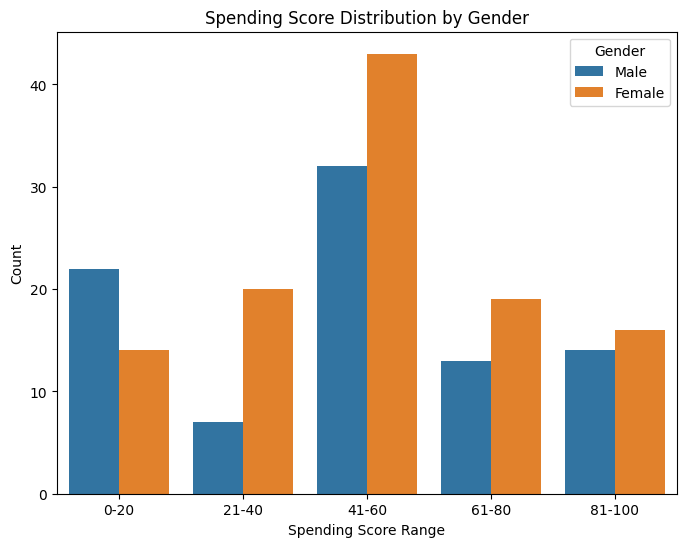

In [27]:

bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['SpendingScoreBin'] = pd.cut(df['Spending Score (1-100)'], bins=bins, labels=labels)

# Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='SpendingScoreBin', hue='Gender', data=df)
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Spending Score Range')
plt.ylabel('Count')
plt.show()

Do high-income customers always have high spending scores?
A. High-income customers don’t always have high spending scores.
    
Is gender affecting income/spending patterns?
A. Gender shows some influence on income/spending patterns.
    
Which feature pairs seem to form natural groups?
A. Annual Income vs Spending Score forms the clearest natural groups.
    

In [29]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959


In [32]:
kmeans = KMeans(n_clusters=5) 
kmeans.fit(scaled_df)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [33]:
scaled_df['Cluster'] = kmeans.labels_

print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  0.019231            0.000000                0.387755        0
1  0.057692            0.000000                0.816327        0
2  0.038462            0.008197                0.051020        3
3  0.096154            0.008197                0.775510        0
4  0.250000            0.016393                0.397959        0


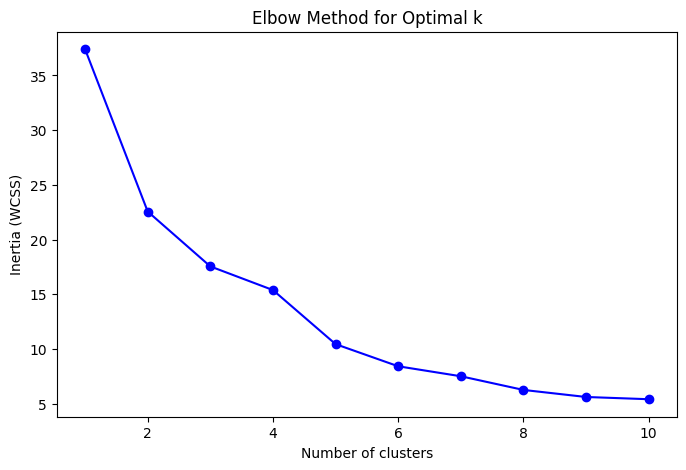

In [35]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

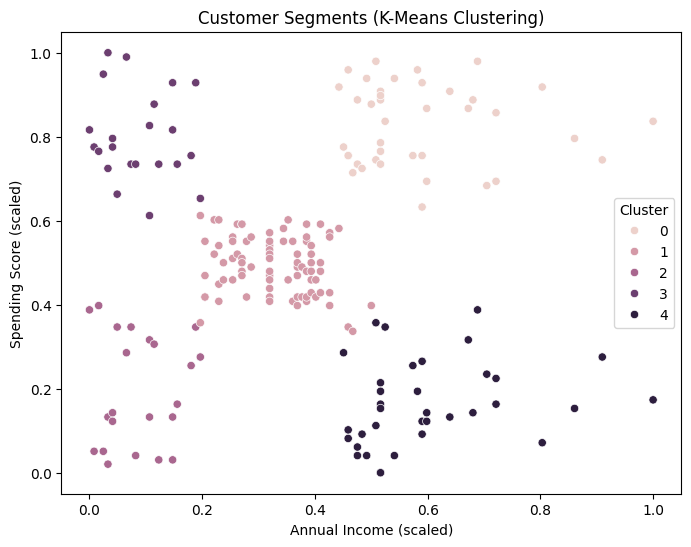

In [37]:
X = scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
scaled_df['Cluster'] = kmeans.labels_


plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=scaled_df['Cluster'],)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

Cluster 0 – High Income, High Spending 

Cluster 1 – Low Income, High Spending 

Cluster 2 – High Income, Low Spending 

Cluster 3 – Low Income, Low Spending 

Cluster 4 – Medium Income, Medium Spending

Why might customers with similar income behave differently in spending?
A. Customers with similar income may differ in spending due to personal preferences, lifestyle, or financial priorities.
    
Does gender significantly impact clusters, or is income more dominant?
A. Income is generally more dominant in clustering, though gender can show subtle effects.
    
What if you force more clusters (say k=7) – does it still make sense?
A. Forcing more clusters (k=7) may create over-segmentation and less meaningful groups.
    
How would segmentation help in targeted marketing campaigns?
A. Segmentation allows tailored marketing strategies to target specific customer behaviors effectively.